In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
creditcard_df_cleaned = pd.read_csv('Data-Cleaned.csv')
creditcard_df_cleaned

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8946,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
creditcard_df_cleaned.drop(['Unnamed: 0'], axis = 'columns', inplace = True)

In [4]:
creditcard_df_cleaned.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df_cleaned)

In [6]:
creditcard_df_scaled.shape

(8949, 17)

In [7]:
creditcard_df_scaled

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.31099323,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.08926514,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.101699  ,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.33548999,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.34693042,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.33297104,
        -0.52558844, -4.12691899]])

In [8]:
wcss = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter) 

In [9]:
wcss

[152133.00000000026,
 127773.48509776269,
 111975.02496382079,
 99065.82208709339,
 91495.64577393158,
 84845.90060623304,
 79521.41219158896,
 74614.12304116049,
 69968.9447132747,
 66452.30992604668,
 63655.599620314955,
 61347.14942330704,
 59170.57375927791,
 57457.86422080401,
 55902.430917668804,
 54279.90615388505,
 53016.37489327496,
 51922.80380185023,
 50672.910786558205]

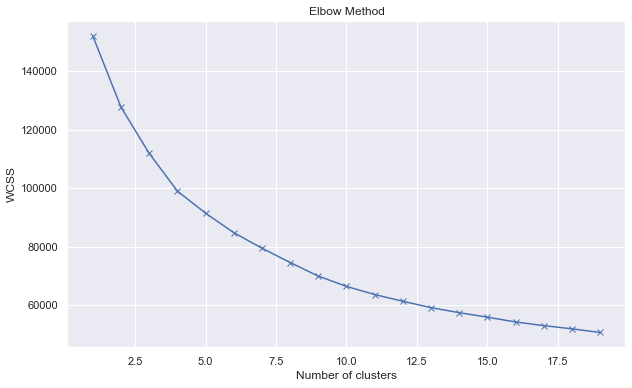

In [10]:
plt.figure(figsize = (10,6))
number_clusters = range(1, 20)
plt.plot(number_clusters, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [12]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [13]:
labels

array([5, 2, 7, ..., 4, 4, 4])

In [14]:
kmeans.cluster_centers_.shape

(8, 17)

In [15]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df_cleaned.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700983,-2.145029,-0.310507,-0.235089,-0.302172,-0.319907,-0.555538,-0.443307,-0.439717,-0.520707,-0.376166,-0.419451,-0.172431,-0.191701,-0.256455,0.284743,0.199823
1,-0.361243,0.332989,-0.033538,-0.242586,0.366184,-0.362628,0.997681,-0.384546,1.211574,-0.473196,-0.359782,0.192220,-0.259389,-0.213813,-0.029324,0.317086,0.260795
2,1.672846,0.395291,-0.222933,-0.160017,-0.233207,1.991422,-0.479900,-0.212496,-0.418454,1.908920,1.913129,-0.270957,1.015320,0.798086,0.546208,-0.394870,0.072038
3,1.048004,0.464101,2.494214,1.803880,2.583490,-0.154763,1.162956,1.557323,1.269114,-0.278837,-0.144854,3.117420,1.302003,1.438786,0.558864,0.248360,0.337496
4,-0.338117,-0.339581,-0.287165,-0.214299,-0.284930,0.066323,-0.190569,-0.285824,-0.213785,0.303651,-0.001209,-0.384788,-0.565966,-0.391788,-0.209635,0.018010,-3.194119
5,0.007210,0.403443,-0.356327,-0.241386,-0.398948,-0.100401,-0.848930,-0.393482,-0.751314,0.094111,-0.035592,-0.480510,-0.306905,-0.253224,-0.012804,-0.455751,0.273272
6,1.845180,0.340412,12.296613,12.823005,5.515863,0.272474,1.043069,2.144888,0.896651,-0.380334,-0.109761,4.555904,3.184973,9.047406,1.030807,1.222155,0.298215
7,-0.136614,0.399764,0.540097,0.669937,0.046072,-0.332422,0.978791,1.903684,0.169698,-0.414694,-0.332689,0.616202,0.430899,0.143158,-0.159179,0.447572,0.268552


In [16]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df_cleaned.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.573461,0.369440,339.885313,202.285601,137.850812,308.067290,0.267447,0.070229,0.189722,0.030936,0.681895,4.285110,3867.038447,1178.359551,266.613855,0.237018,11.785110
1,812.731327,0.956197,931.658851,189.841204,742.263841,218.475402,0.890812,0.087759,0.845993,0.040444,0.793706,19.489510,3550.634467,1114.346158,795.959330,0.246478,11.866633
2,5046.622704,0.970949,526.997285,326.894536,200.217760,5155.263866,0.297804,0.139087,0.198172,0.517156,16.305430,7.976244,8188.806047,4043.799745,2137.278551,0.038234,11.614253
3,3746.033560,0.987242,6332.475350,3586.720840,2747.435182,654.398285,0.957143,0.667074,0.868861,0.079340,2.260504,92.201681,9231.932773,5898.630434,2166.773777,0.226376,11.969188
4,860.868453,0.796943,389.758246,236.793238,153.443477,1118.048889,0.413923,0.117211,0.279514,0.195908,3.240829,5.146730,2435.119617,599.108516,375.731978,0.159000,7.247209
5,1579.654678,0.972879,241.986209,191.832061,50.334039,768.404961,0.149698,0.085094,0.065884,0.153974,3.006180,2.767357,3377.741427,1000.251609,834.460218,0.020427,11.883315
6,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
7,1280.289149,0.972008,2157.293485,1704.515918,452.777567,281.822712,0.883231,0.770403,0.431921,0.052152,0.978610,30.028520,6062.323772,2147.778927,493.323875,0.284644,11.877005


In [24]:
creditcard_df_cluster = pd.concat([creditcard_df_cleaned, pd.DataFrame({'Cluster':labels})], axis = 'columns')
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


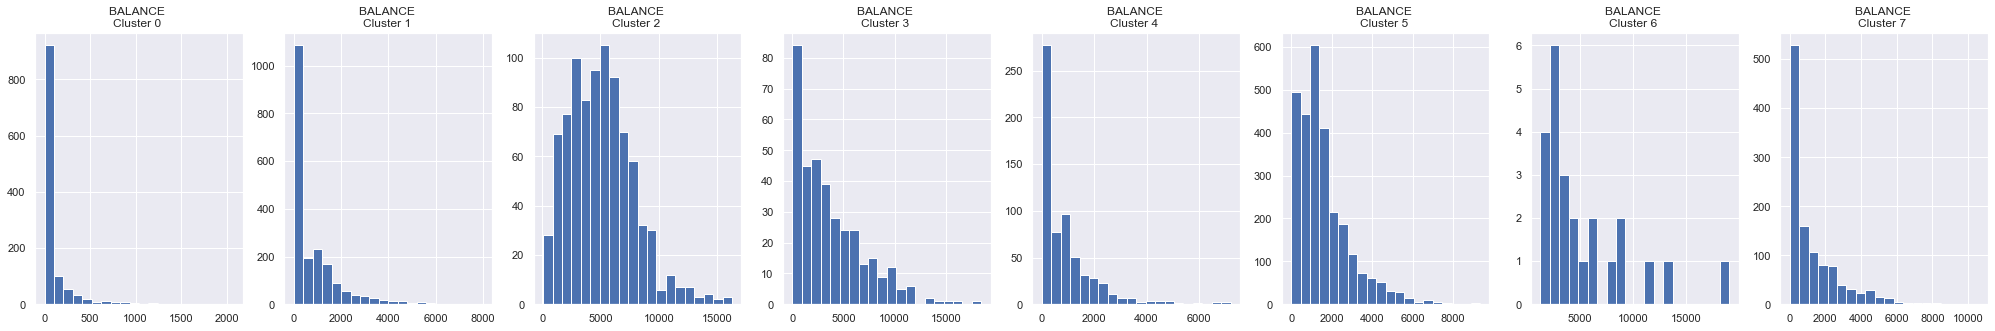

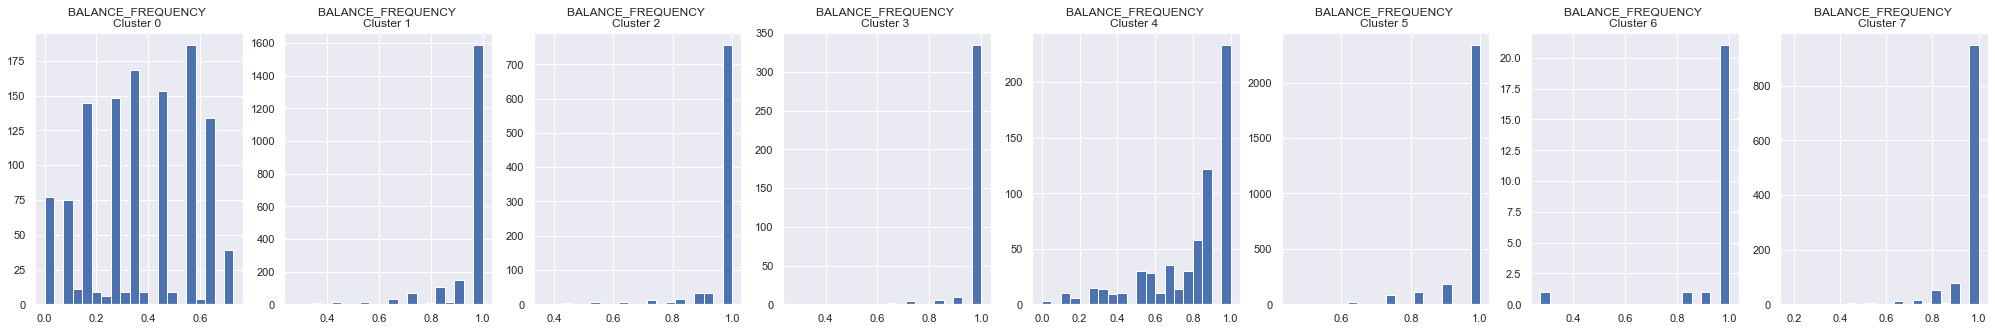

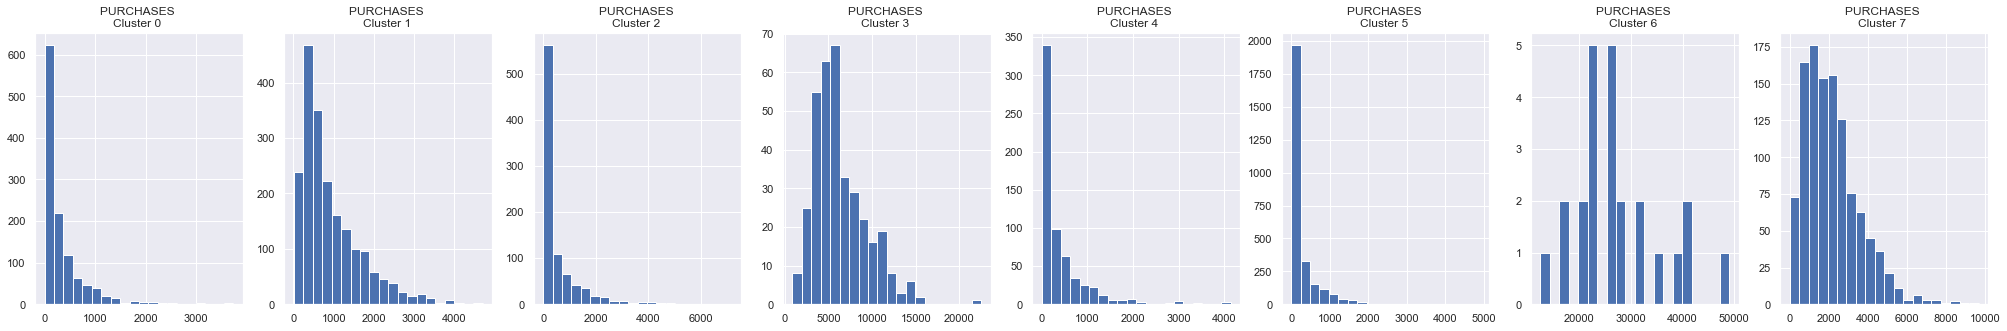

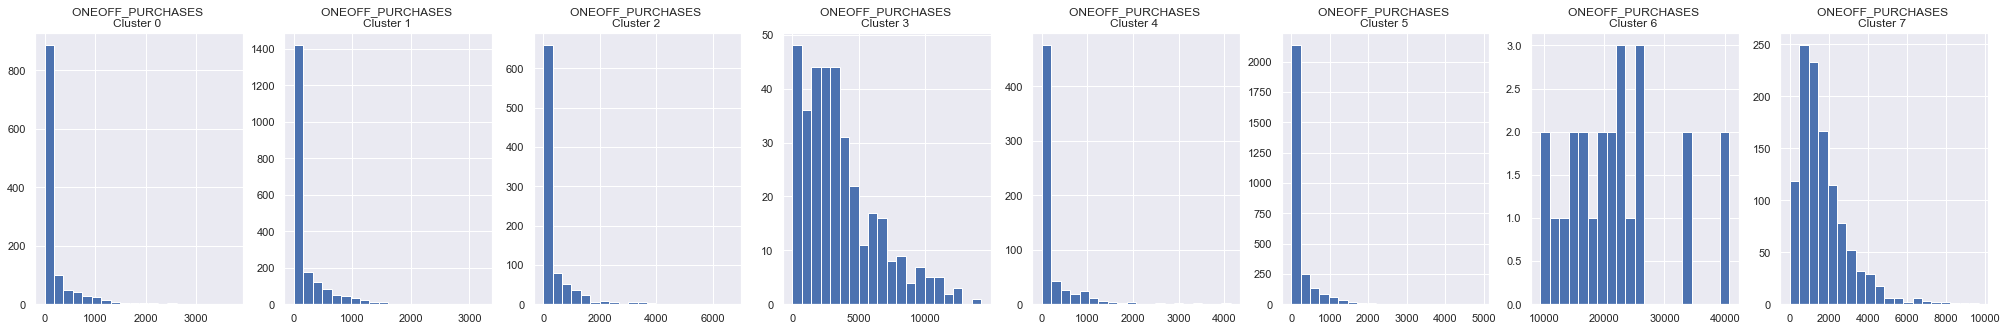

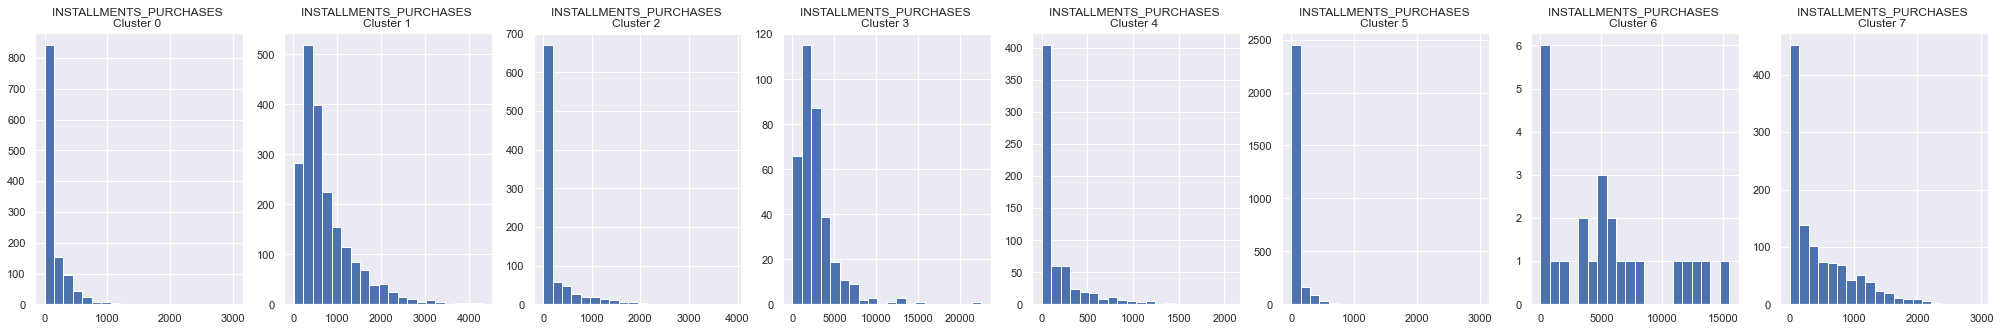

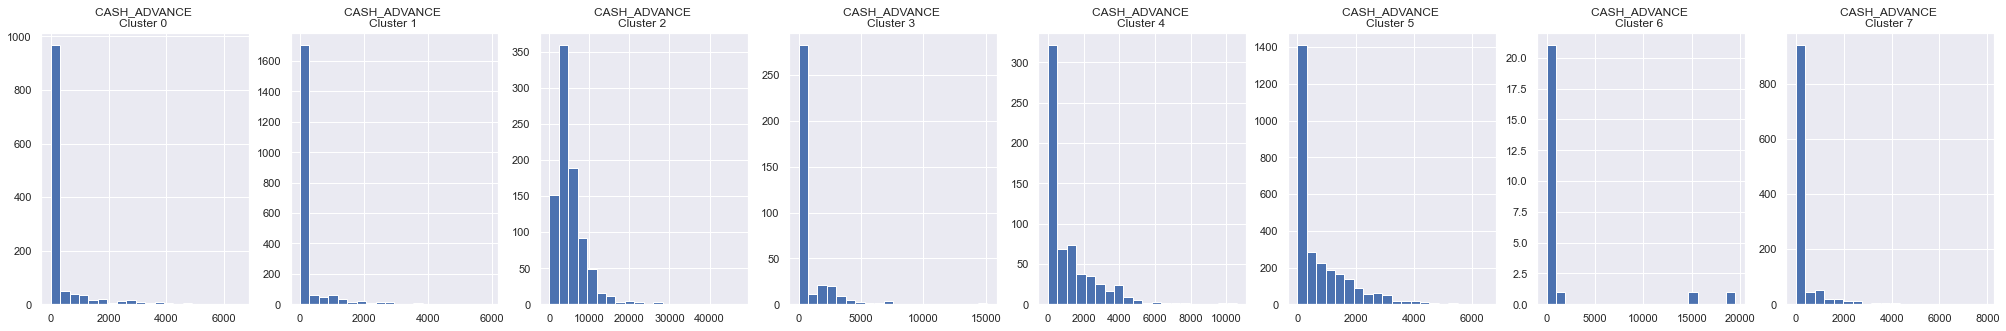

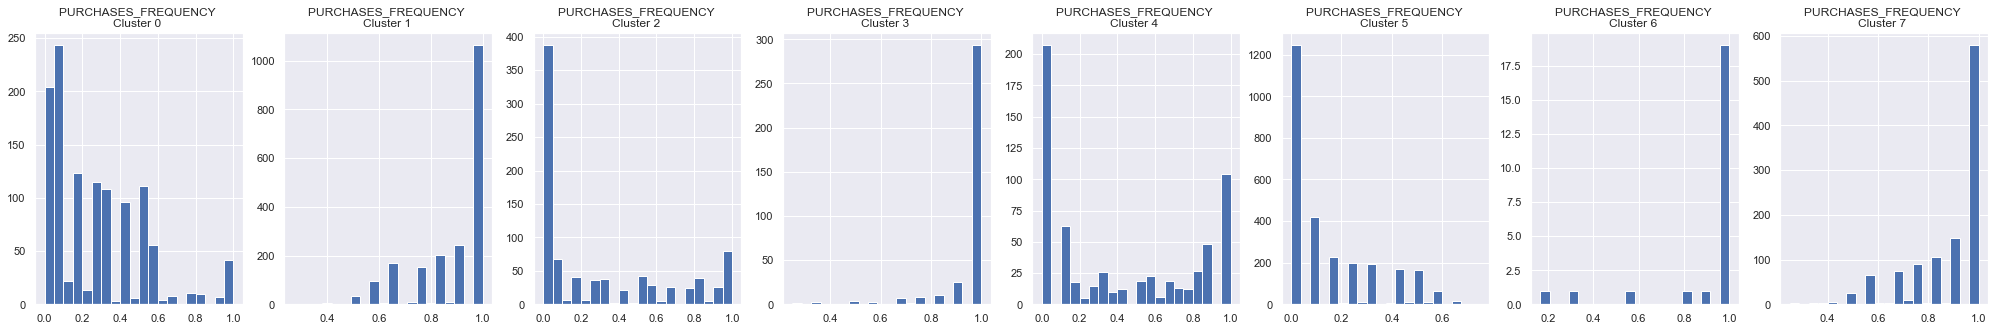

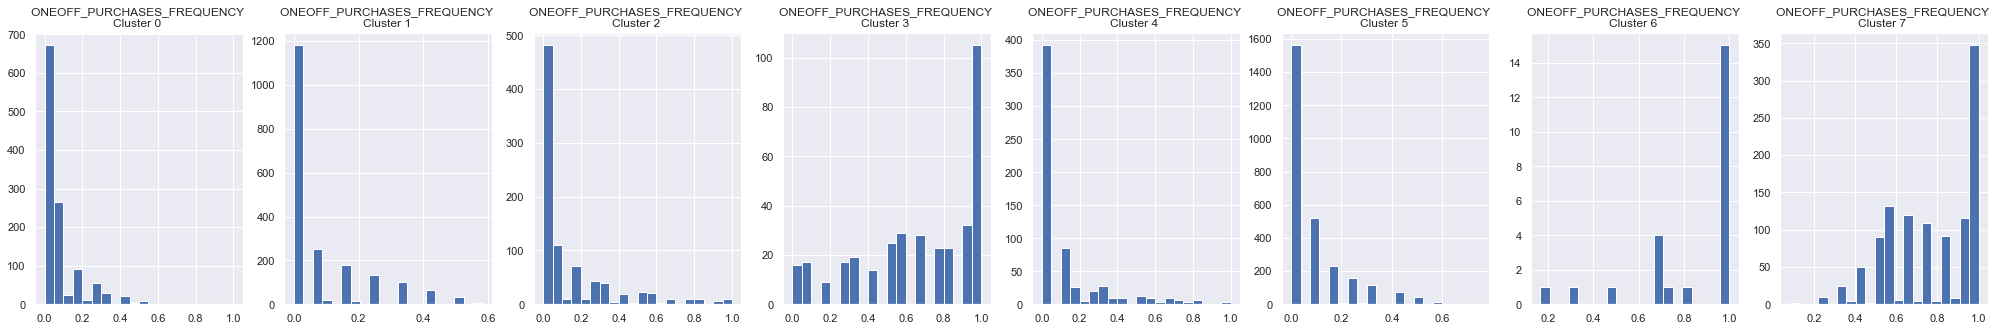

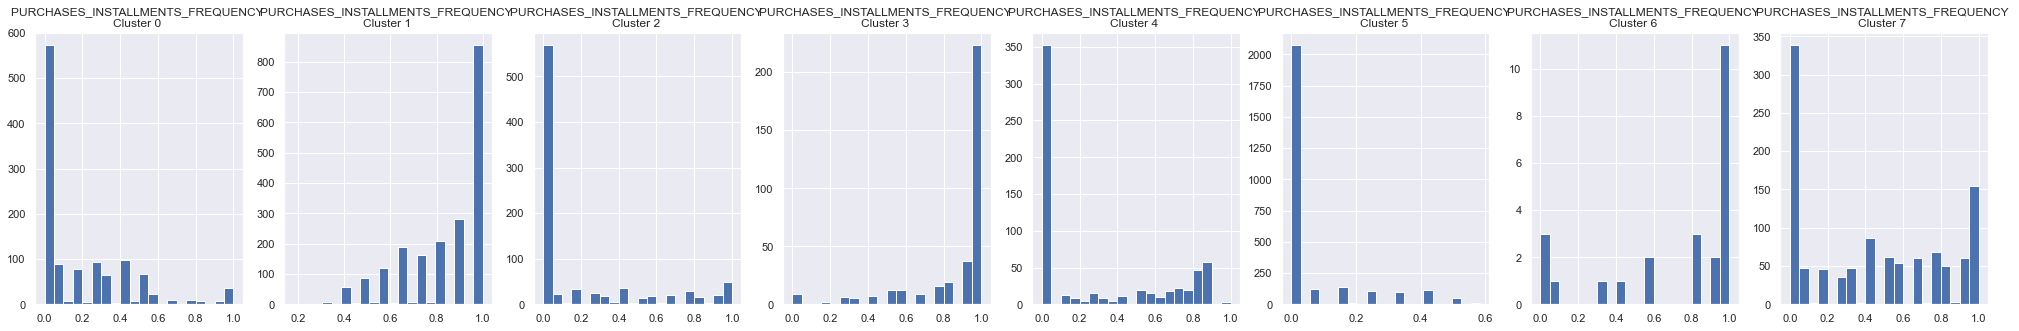

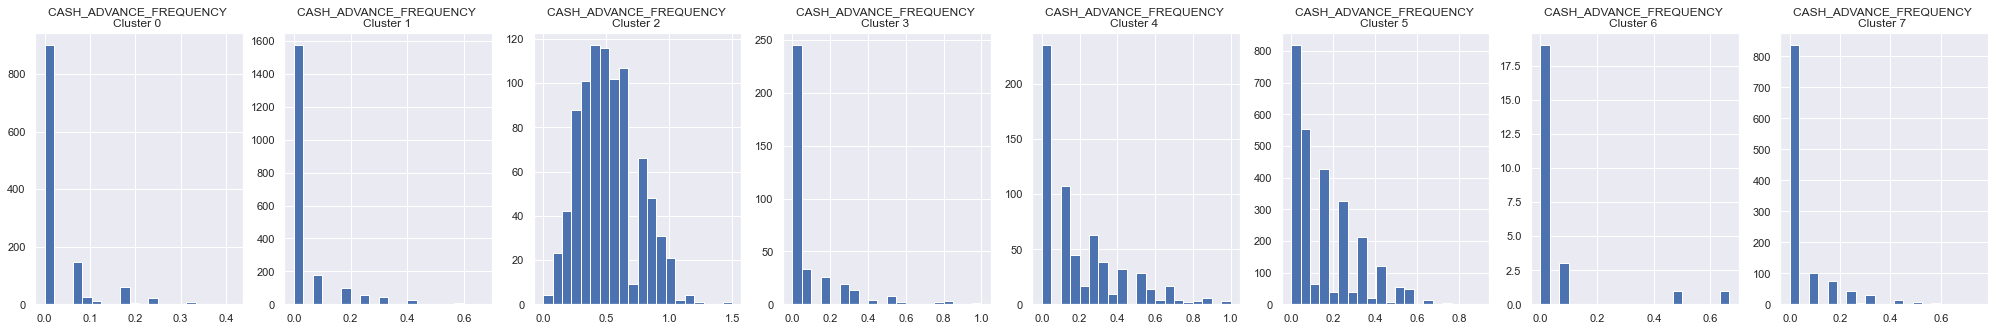

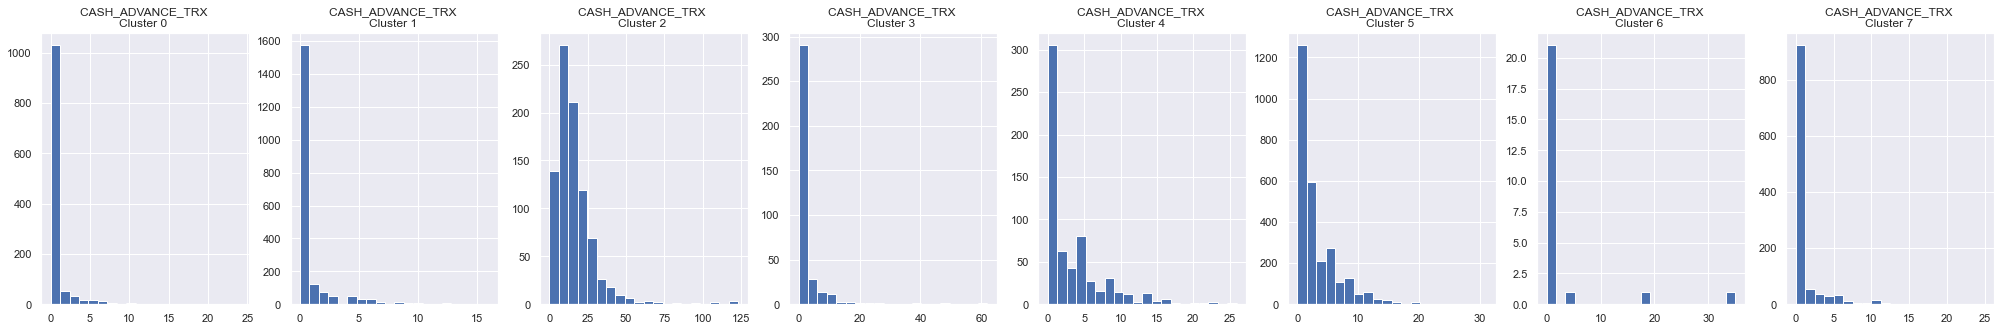

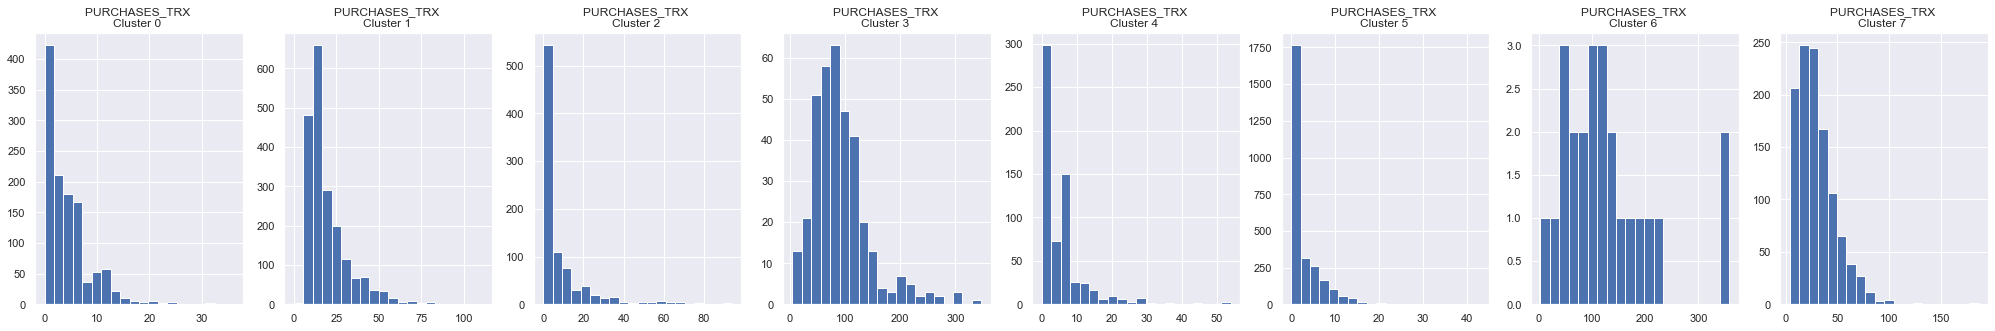

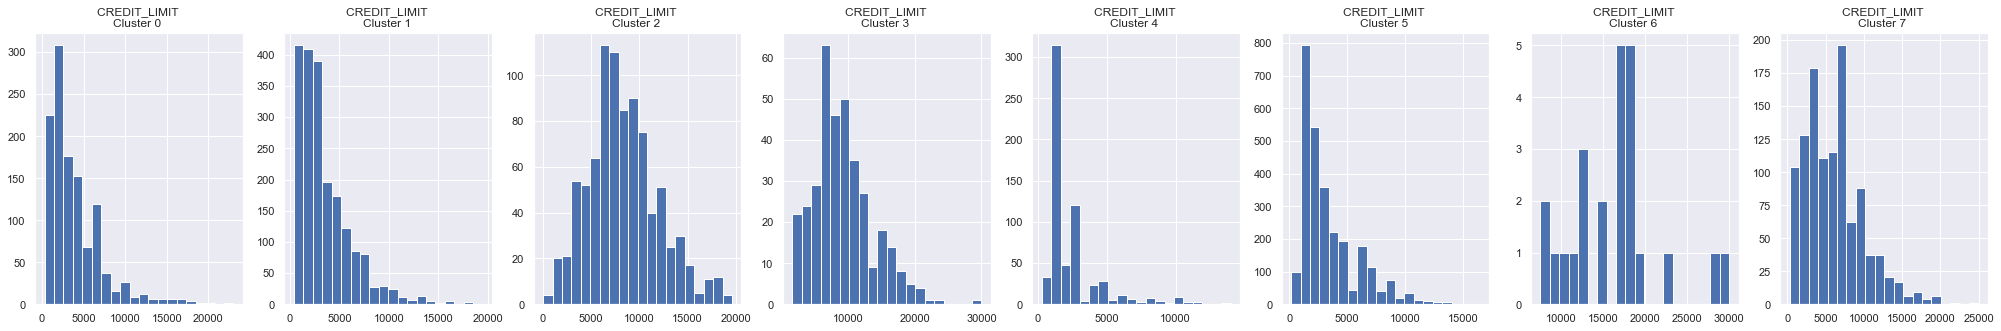

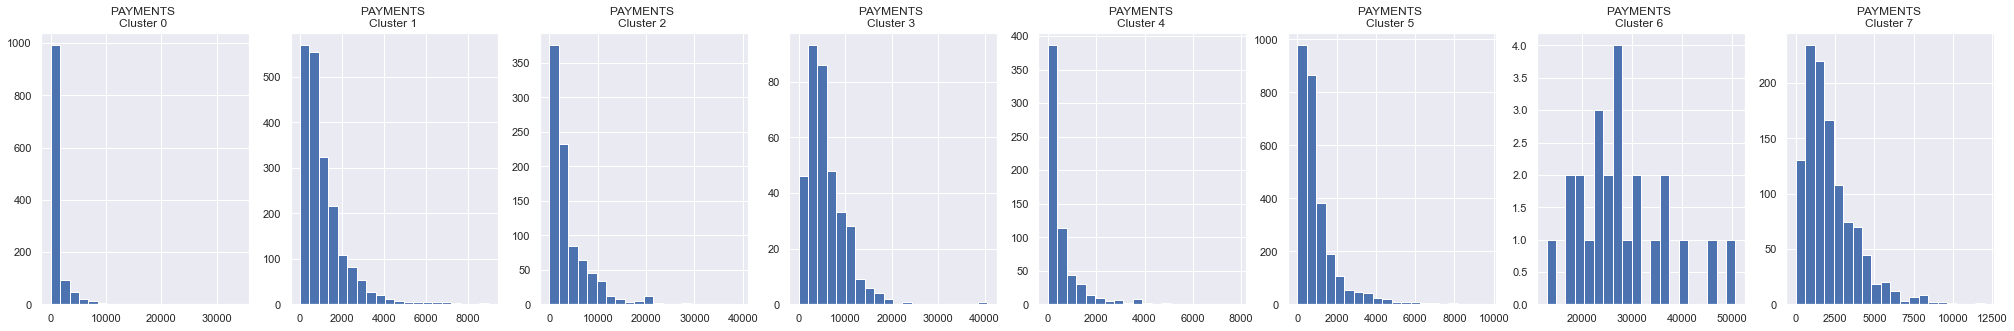

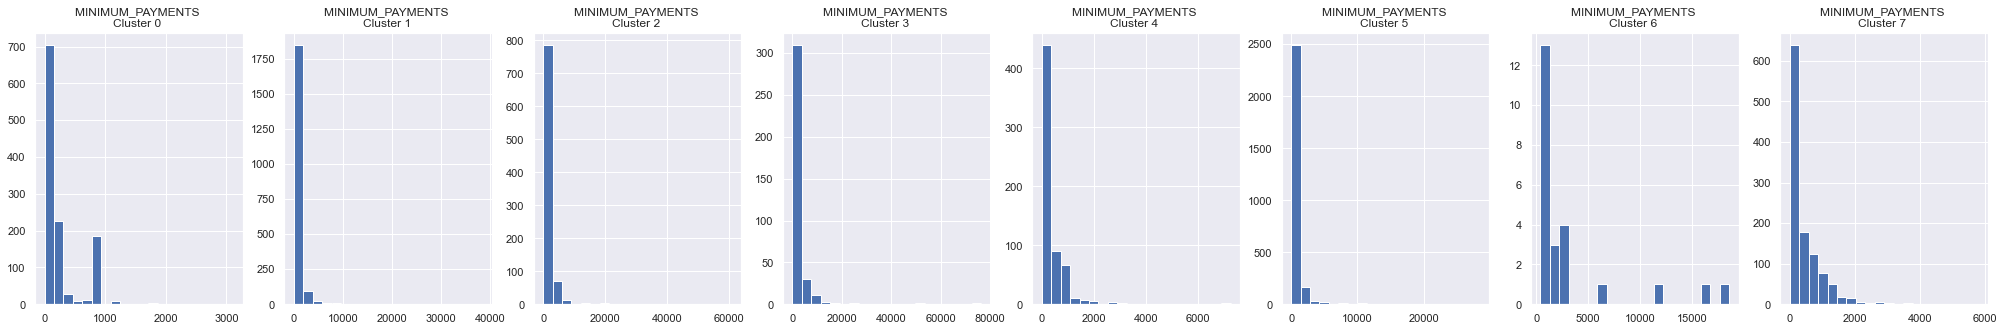

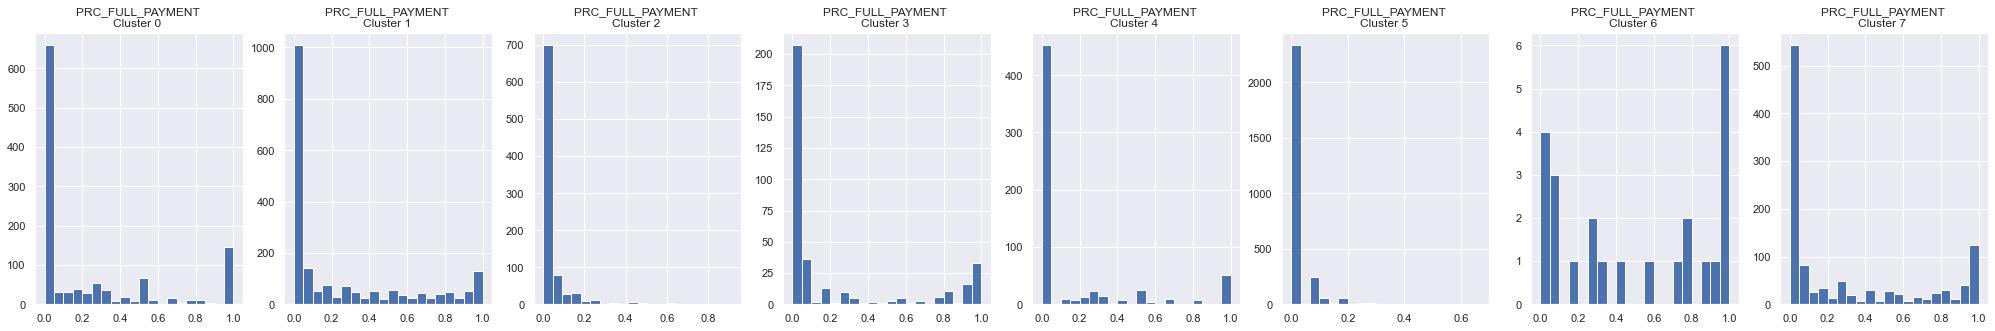

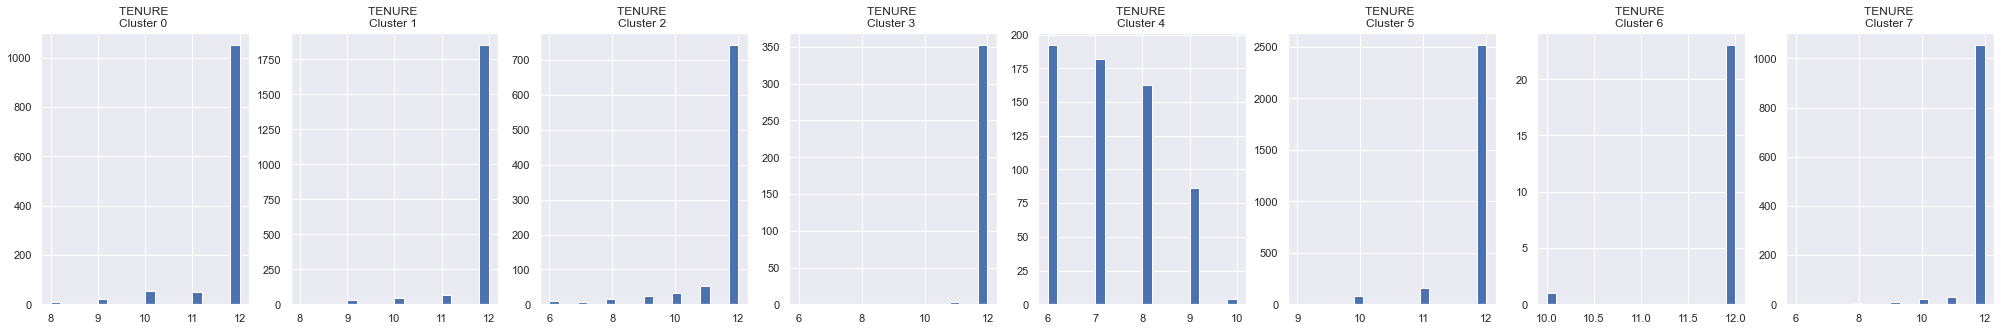

In [23]:
# Plot the histogram of various clusters
for i in creditcard_df_cleaned.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['Cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {} '.format(i,j))
  
  plt.show()



### APPLIED PRINCIPAL COMPONENT ANALYSIS

In [25]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68236187, -1.07672527],
       [-1.13896967,  2.50611556],
       [ 0.96938199, -0.38346313],
       ...,
       [-0.92578677, -1.81048978],
       [-2.33621348, -0.65779942],
       [-0.5560402 , -0.40016539]])

In [26]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682362,-1.076725
1,-1.138970,2.506116
2,0.969382,-0.383463
3,-0.873813,0.042922
4,-1.599683,-0.688772


In [27]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 'columns')
pca_df.head()

,pca1,pca2,cluster
0,-1.682362,-1.076725,5
1,-1.138970,2.506116,2
2,0.969382,-0.383463,7
3,-0.873813,0.042922,5
4,-1.599683,-0.688772,5


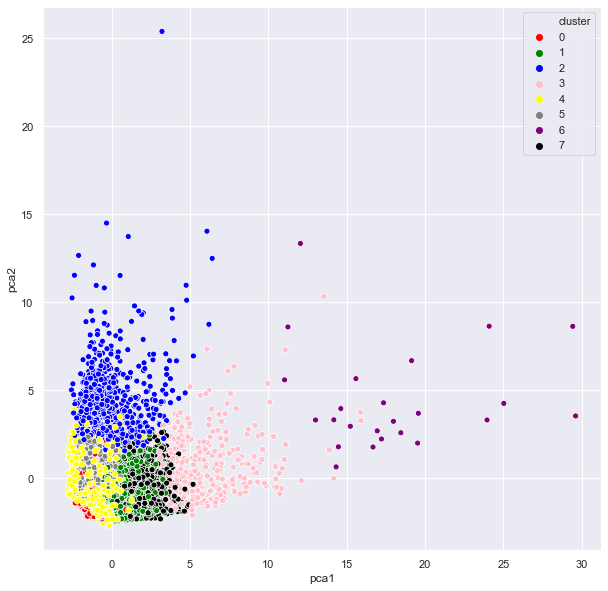

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()